In [1]:
#Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path


In [2]:
#import data
algo_returns_path = Path('algo_returns.csv')
whale_returns_path = Path('whale_returns.csv')
sp500_history_path = Path('sp500_history.csv')

In [3]:
# read in data and index by datatime
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [4]:
whale_returns = pd.read_csv(whale_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
sp500_history = pd.read_csv(sp500_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [6]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"]

C:\Users\nosta\AppData\Local\Temp\ipykernel_12596\3762560262.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [23]:
# Fix Data Types

sp500_history["Close"] = sp500_history["Close"].str.replace(",", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [24]:
 #Fix Data Typescalcul daily returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [29]:
#identify of nulls records
algo_returns.isnull().mean() * 100
whale_returns.isnull().mean() * 100
sp500_history.isnull().mean() * 100


Close    0.0
dtype: float64

In [30]:
algo_returns=algo_returns.dropna()
whale_returns=whale_returns.dropna()
sp500_history=sp500_history.dropna()

In [31]:
#validate nulls have been dropped
algo_returns.isnull().sum()
whale_returns.isnull().sum()
sp500_history.isnull().sum()

Close    0
dtype: int64

In [32]:
joined_data_columns = pd.concat([algo_returns, whale_returns, sp500_history], axis="columns", join="inner")
joined_data_columns

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,2107.78
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,2098.53
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,2101.04
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,2071.26
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,2079.43
...,...,...,...,...,...,...,...
2019-04-16,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,2907.06
2019-04-17,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,2900.45
2019-04-18,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,2905.03


<Axes: xlabel='Date'>

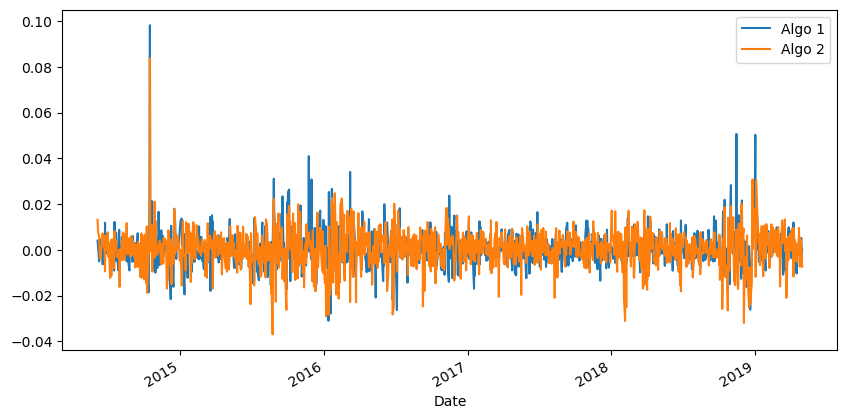

In [33]:
# calcul of daily return of algo_returns
algo_returns.plot(figsize=(10,5))

In [34]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + algo_returns).cumprod()
cumulative_returns.head()  


,Algo 1,Algo 2
Date,,
2014-06-05,1.004062,1.013285
2014-06-06,1.005927,1.021679
2014-06-09,1.000885,1.027470
2014-06-10,1.005295,1.026714
2014-06-11,1.010081,1.022852


<Axes: xlabel='Date'>

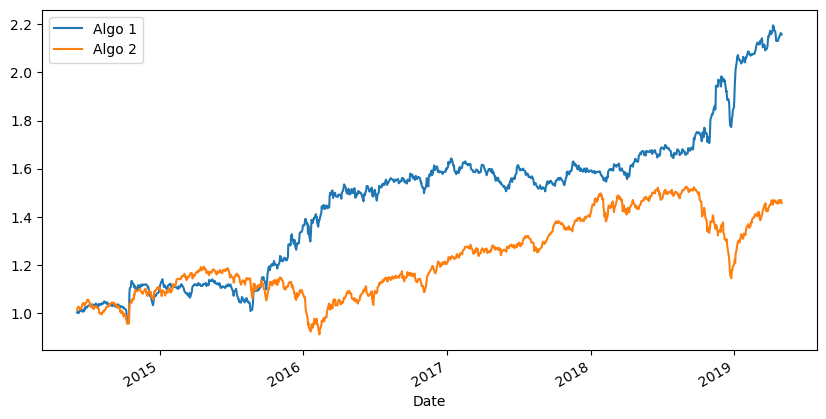

In [35]:
# Plot the cumulative_returns of the algo_returns over the last 5 years
cumulative_returns.plot(figsize=(10,5))

<Axes: xlabel='Date'>

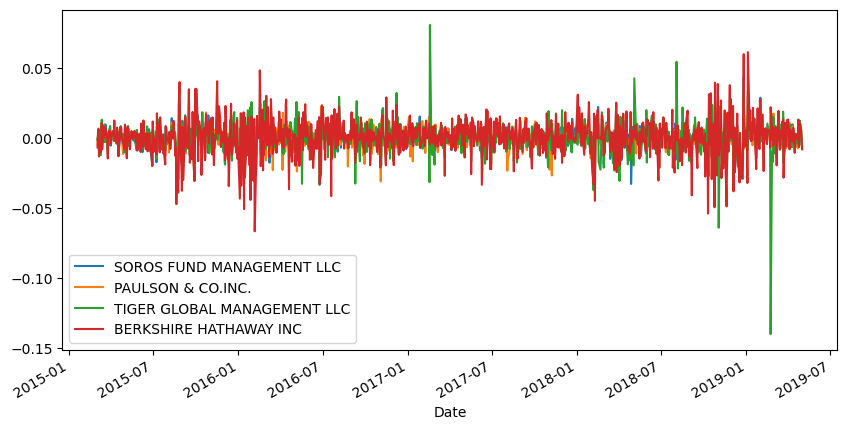

In [37]:
#calcul daily return of whale_returns
whale_returns.plot(figsize=(10,5))

<Axes: xlabel='Date'>

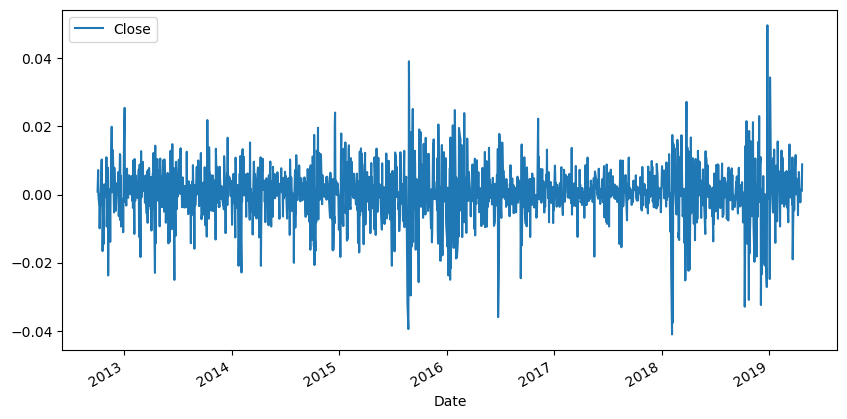

In [40]:
#calcul daily return of sp500_returns
sp500_returns.plot(figsize=(10,5))

In [38]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + whale_returns).cumprod()
cumulative_returns.head()  


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431
2015-03-04,1.000962,0.998245,0.996972,0.997617
2015-03-05,1.004981,1.002314,0.999319,1.004327
2015-03-06,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.997617,1.002951,0.996633,0.989534


In [41]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + sp500_returns).cumprod()
cumulative_returns.head()  


,Close
Date,
2012-10-01,NaN
2012-10-02,1.000872
2012-10-03,1.004500
2012-10-04,1.011707
2012-10-05,1.011381


<Axes: xlabel='Date'>

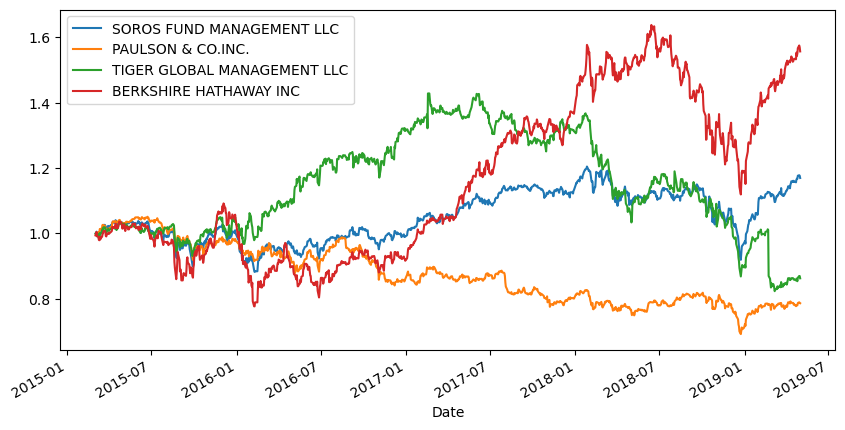

In [39]:
# Plot the cumulative_returns of the whale_returns over the last 5 years
cumulative_returns.plot(figsize=(10,5))

<Axes: xlabel='Date'>

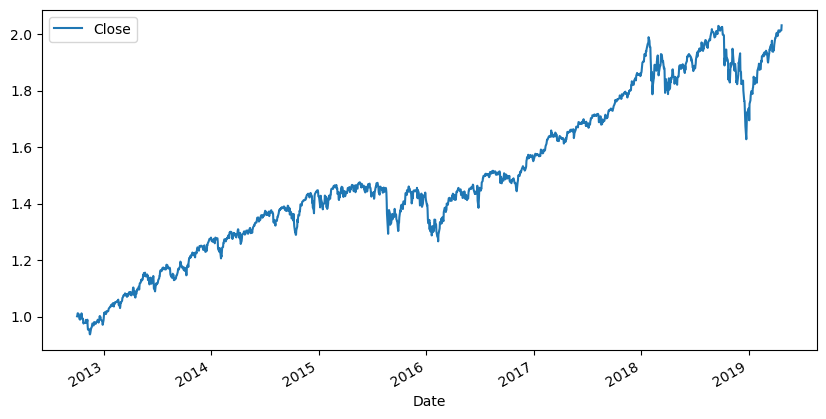

In [42]:
# Plot the cumulative_returns of the sp500_returns over the last 5 years
cumulative_returns.plot(figsize=(10,5))

In [43]:
# Concat returns DataFrames
all_returns = pd.concat([algo_returns,whale_returns,sp500_returns], axis='columns', join='inner')
all_returns.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944


In [44]:
# Calculate std dev
all_portfolio_std = all_returns.std()
all_portfolio_std.head()

Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
dtype: float64

In [45]:
# Calculate sharpe ratio
sharpe_ratios = (all_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios.head()

Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

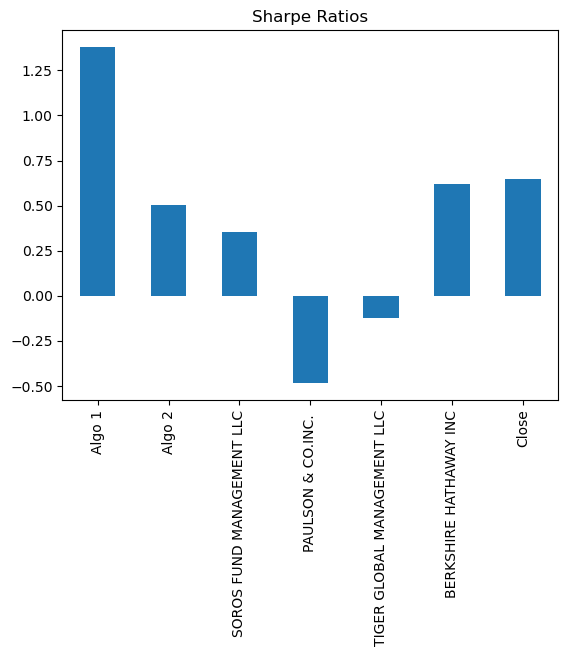

In [46]:
# Plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

In [52]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = algo_returns.corr()
correlation

,Algo 1,Algo 2
Algo 1,1.000000,0.346568
Algo 2,0.346568,1.000000


In [53]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = whale_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000


In [54]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = sp500_returns.corr()
correlation

,Close
Close,1.0


In [56]:
combined_df = pd.concat([algo_returns,whale_returns,sp500_returns], axis="columns", join="inner")
combined_df.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Close
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944
